<a href="https://colab.research.google.com/github/Deng0518/Deep-Learn/blob/main/DL_Final_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Realstic Data - META


In [ ]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
from tensorflow import keras
from tensorflow.keras import backend as clear
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

# Functions for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_squared_error #MSE,RMSE
from sklearn.metrics import mean_absolute_percentage_error #MAPE

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Meta.csv')

data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-06-10,24.059999,24.600000,23.99,24.330000,24.330000,58393000
1,2013-06-11,24.030001,24.350000,24.00,24.030001,24.030001,29885900
2,2013-06-12,24.160000,24.260000,23.58,23.770000,23.770000,26445800
3,2013-06-13,23.719999,23.830000,23.27,23.730000,23.730000,31189300
4,2013-06-14,23.559999,23.889999,23.26,23.629999,23.629999,30677100


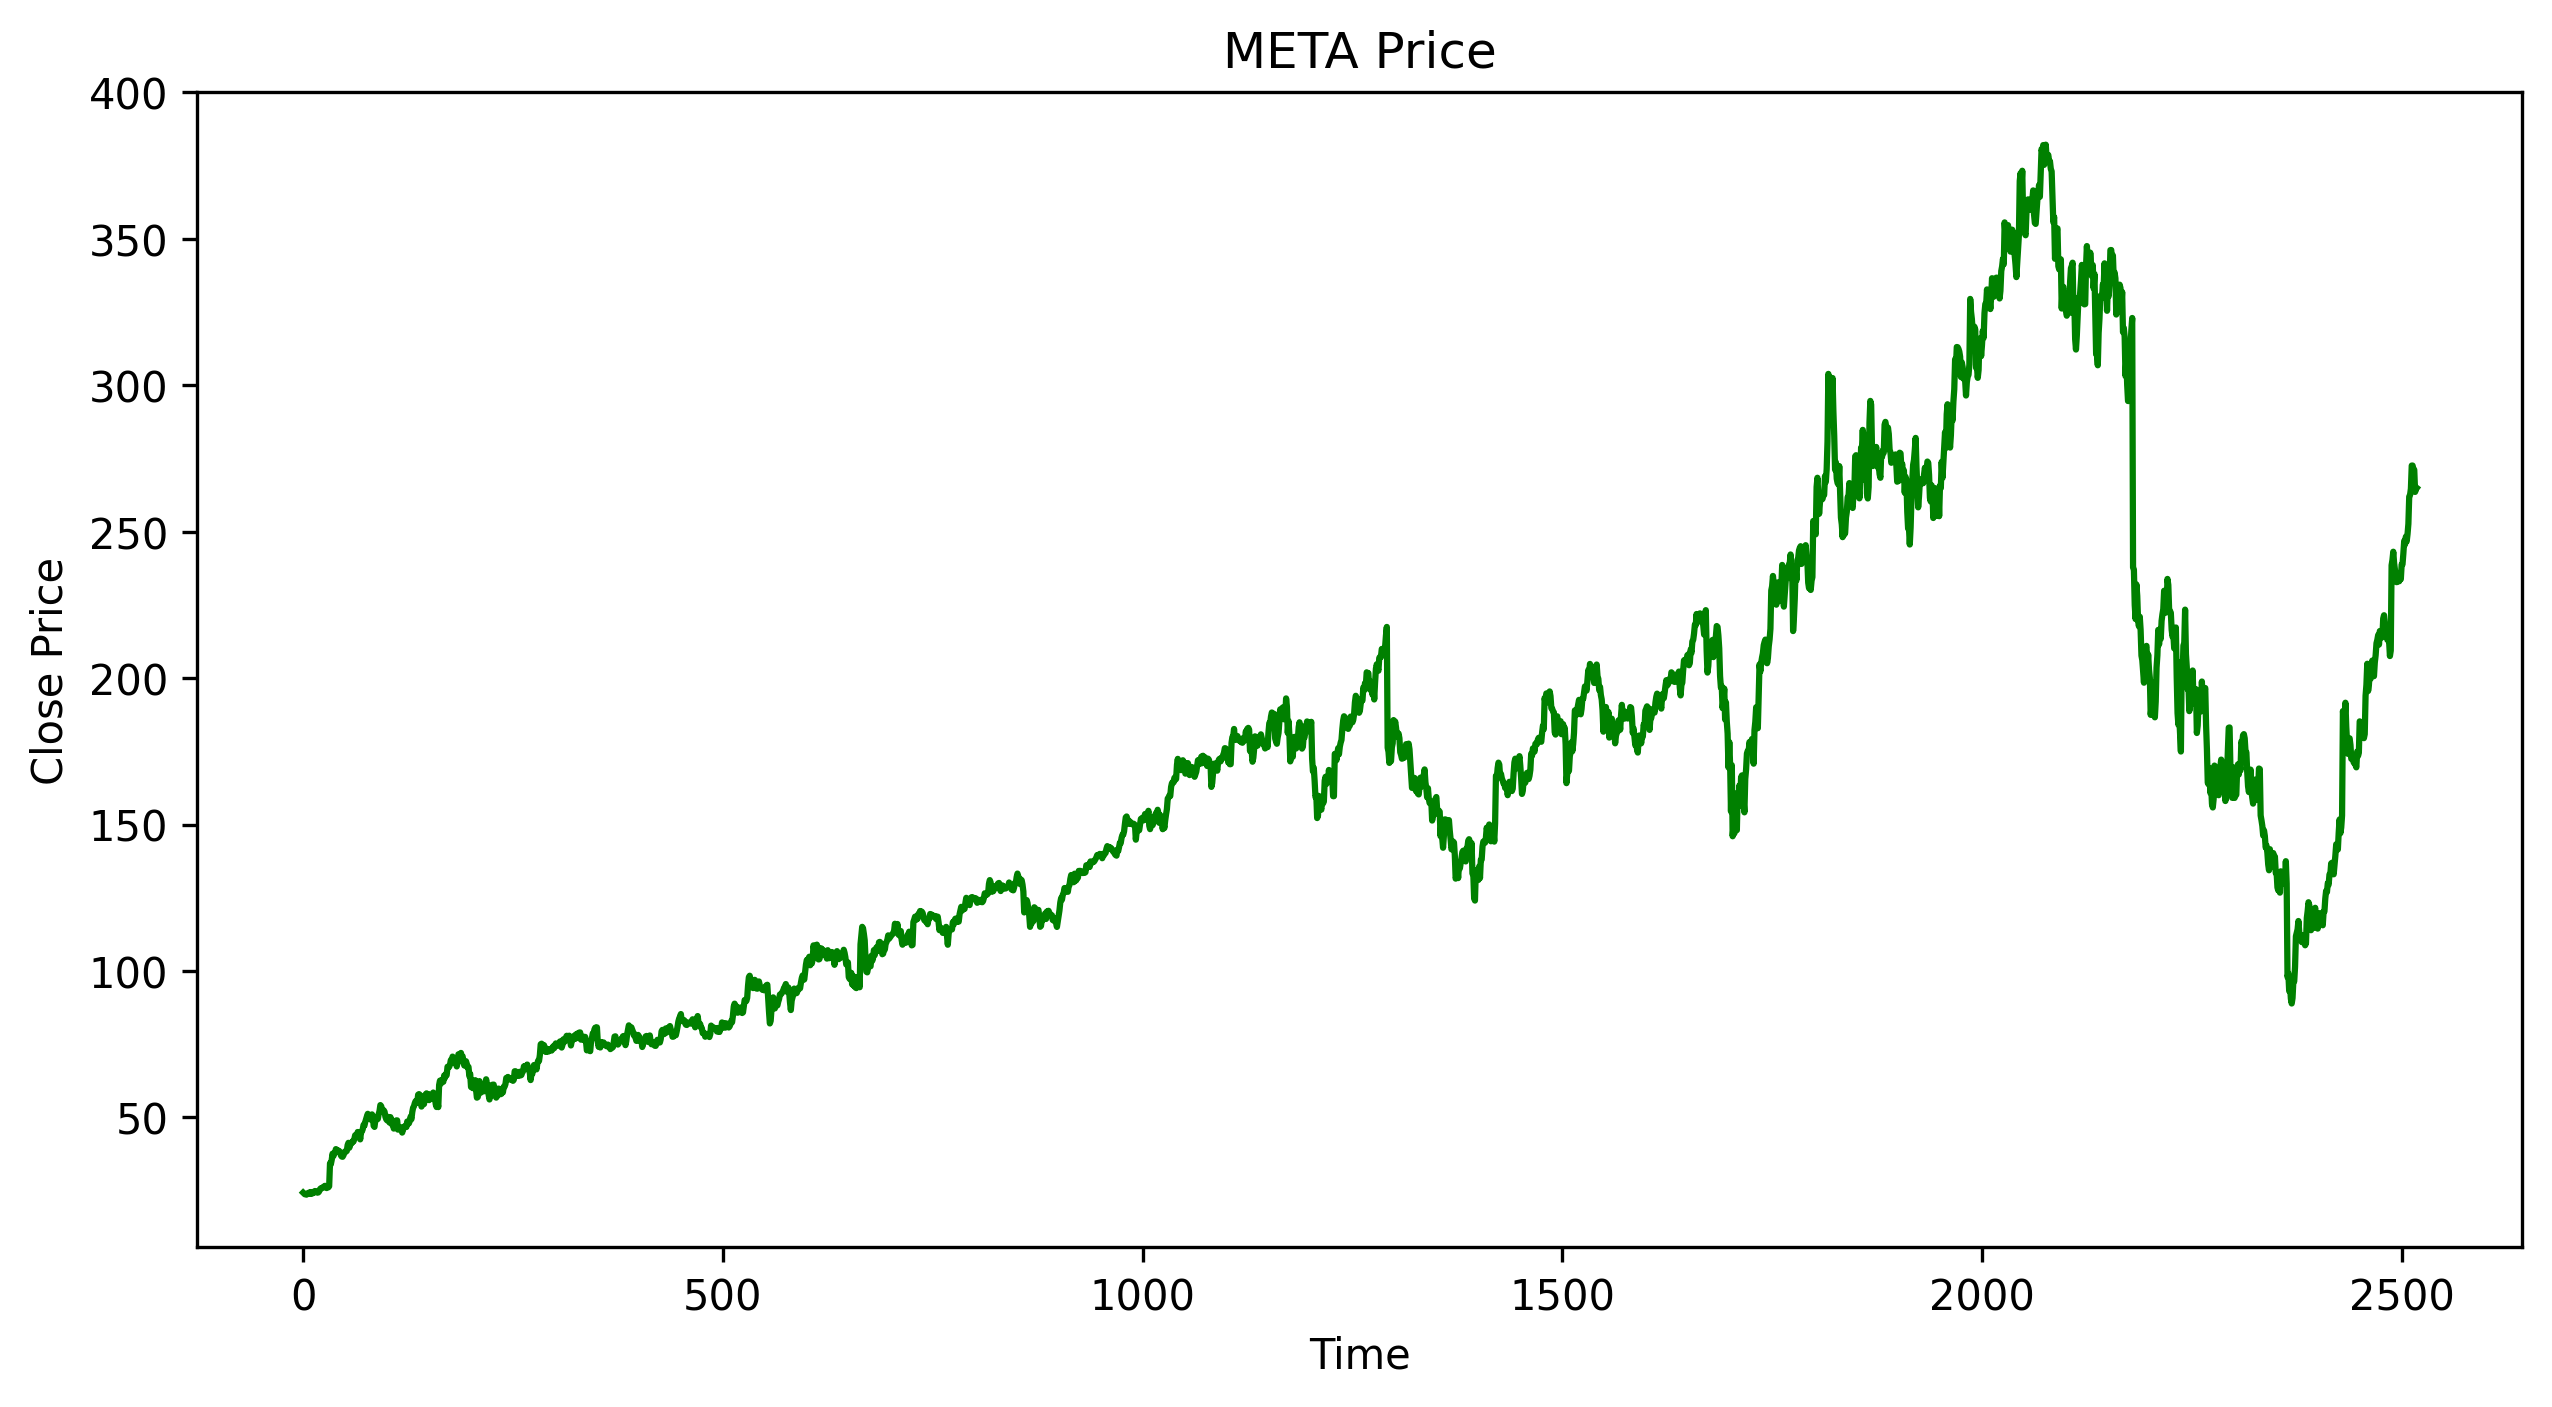

In [ ]:
data=data['Close']
plt.figure(figsize=(10,5),dpi=300)
plt.plot(data, color ='green');
plt.ylabel('Close Price')
plt.title('META Price')
plt.xlabel('Time')
plt.show()

In [ ]:
split = int(0.8*data.shape[0])
Train, Test = data[0:split], data[split:]

val_split = int(0.8*Train.shape[0])
Train,Val = Train[0:val_split], Train[val_split:]
Val = Val.reset_index(drop=True)
Test=Test.reset_index(drop=True)

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
#需將資料做reshape的動作，使其shape為(資料長度,1) 
train_set = Train.values.reshape(-1, 1)
training_set_scaled = sc.fit_transform(train_set)
val_set = Val.values.reshape(-1, 1)
val_set_scaled = sc.transform(val_set)
test_set = Test.values.reshape(-1, 1)
test_set_scaled = sc.transform(test_set)

X_train = [] 
y_train = []
for i in range(5, len(train_set)):
    X_train.append(training_set_scaled[i-5:i]) 
    y_train.append(training_set_scaled[i]) 
X_train, y_train = np.array(X_train), np.array(y_train) 
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

X_val = [] 
y_val = []
for i in range(5, len(val_set)):
    X_val.append(val_set_scaled[i-5:i]) 
    y_val.append(val_set_scaled[i]) 
X_val, y_val = np.array(X_val), np.array(y_val) 
X_val = np.reshape(X_val,(X_val.shape[0], X_val.shape[1], 1))

X_test = []
y_test = []
for i in range(5, len(test_set)):
    X_test.append(test_set_scaled[i-5:i]) 
    y_test.append(test_set_scaled[i])
X_test, y_test = np.array(X_test), np.array(y_test) 
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))

In [ ]:
X_train[0]

array([[0.00361067],
       [0.00206325],
       [0.00072214],
       [0.00051581],
       [0.        ]])

# Fit & compile the model

In [113]:
keras.backend.clear_session()
model = keras.models.Sequential([
    LSTM(32, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.01),
    LSTM(32, activation='relu'),
    Dense(1)
])
opt=Adam(learning_rate=0.001,beta_1=0.95)
model.compile(optimizer=opt, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 32)             4352      
                                                                 
 dropout (Dropout)           (None, 5, 32)             0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________


In [114]:
history = model.fit(X_train, y_train, epochs = 200, batch_size = 32,validation_data=(X_val,y_val))

Epoch 1/200
51/51 [==============================] - 4s 14ms/step - loss: 0.1068 - val_loss: 0.0022
Epoch 2/200
51/51 [==============================] - 0s 5ms/step - loss: 0.0090 - val_loss: 0.0032
Epoch 3/200
51/51 [==============================] - 0s 6ms/step - loss: 0.0027 - val_loss: 0.0142
Epoch 4/200
51/51 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0295
Epoch 5/200
51/51 [==============================] - 0s 7ms/step - loss: 7.7711e-04 - val_loss: 0.0245
Epoch 6/200
51/51 [==============================] - 0s 6ms/step - loss: 6.1160e-04 - val_loss: 0.0130
Epoch 7/200
51/51 [==============================] - 0s 5ms/step - loss: 5.4325e-04 - val_loss: 0.0121
Epoch 8/200
51/51 [==============================] - 0s 5ms/step - loss: 5.1746e-04 - val_loss: 0.0091
Epoch 9/200
51/51 [==============================] - 0s 6ms/step - loss: 4.8327e-04 - val_loss: 0.0055
Epoch 10/200
51/51 [==============================] - 0s 5ms/step - loss: 4.9022e-04 - v

In [115]:
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'val_loss'])

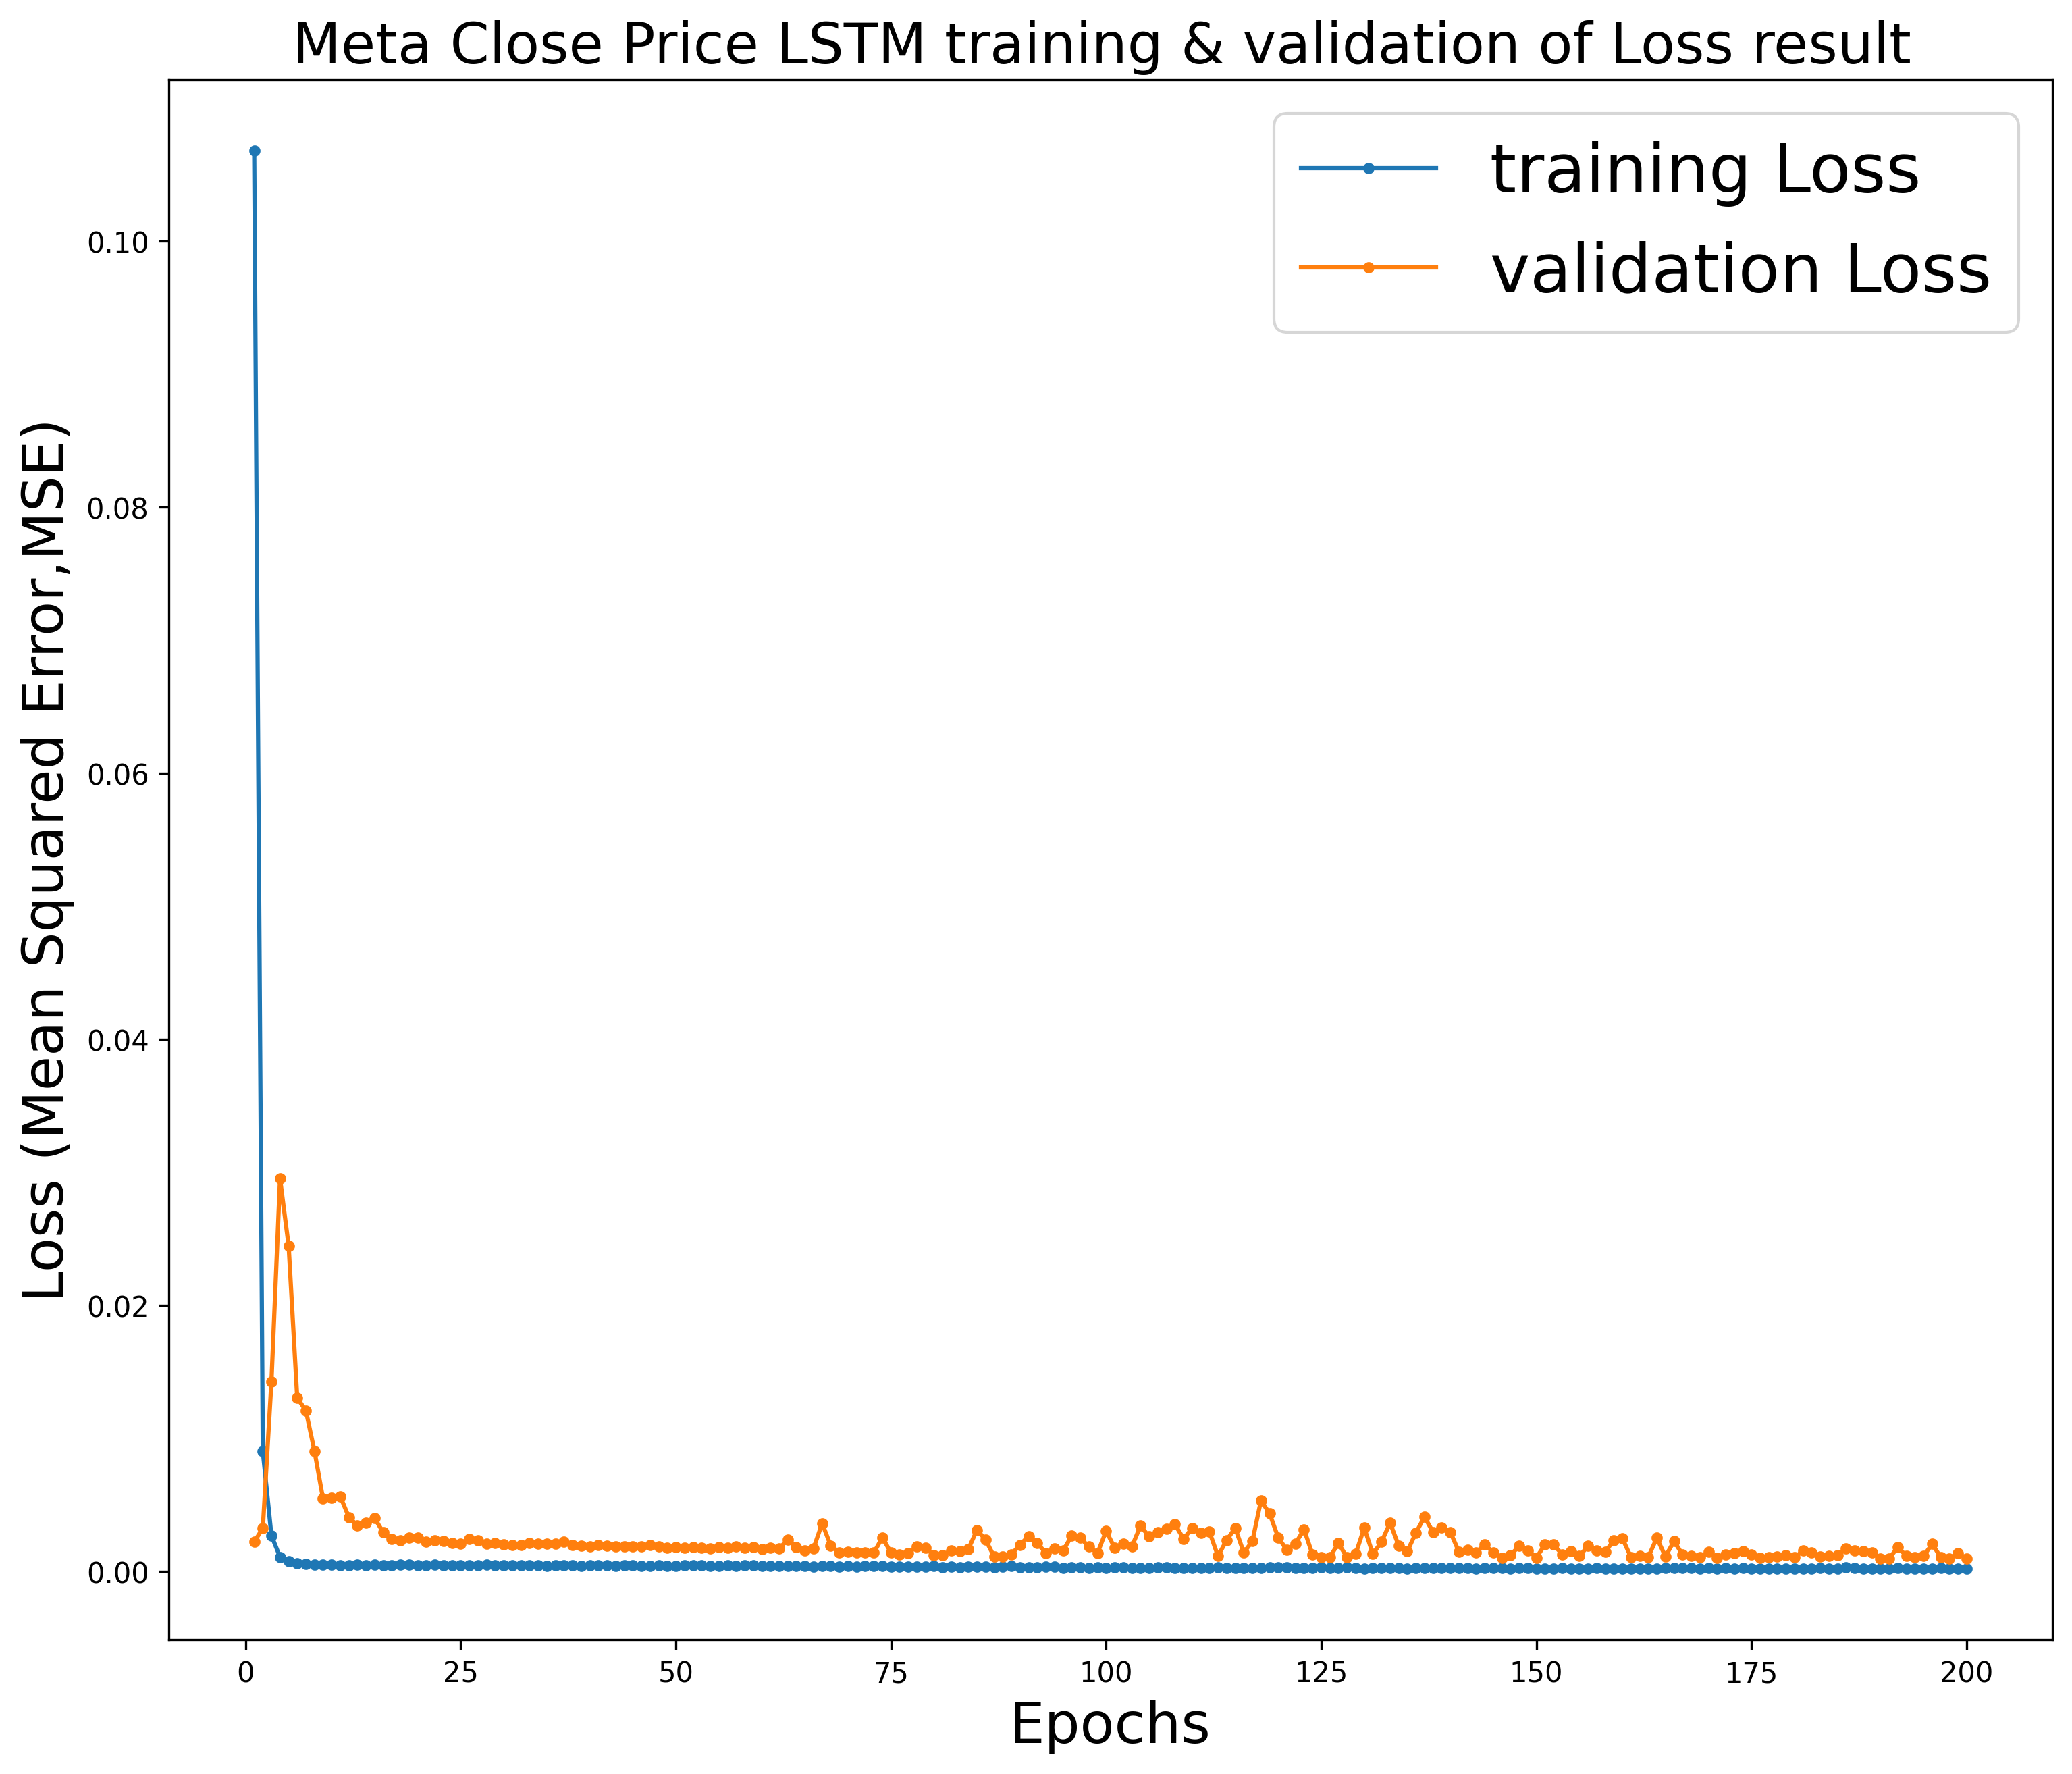

In [116]:
#Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Mean Squared Error,MSE)',fontsize=20)
plt.title('Meta Close Price LSTM training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='.',label='training Loss')
plt.plot(epochs, val_loss_values,marker='.',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

# Testing

In [121]:

predicted_price = model.predict(X_test)
#使用sc的 inverse_transform將股價轉為歸一化前
predicted_price = sc.inverse_transform(predicted_price)
actual_price = sc.inverse_transform(y_test)

16/16 [==============================] - 0s 1ms/step


In [118]:
df1 = pd.DataFrame(predicted_price)
df2 = pd.DataFrame(actual_price)

df1.columns = ['Pred']
df2.columns = ['Actual']

merged_df = pd.concat([df1, df2], axis=1)
merged_df.to_csv('output.csv', index=False)

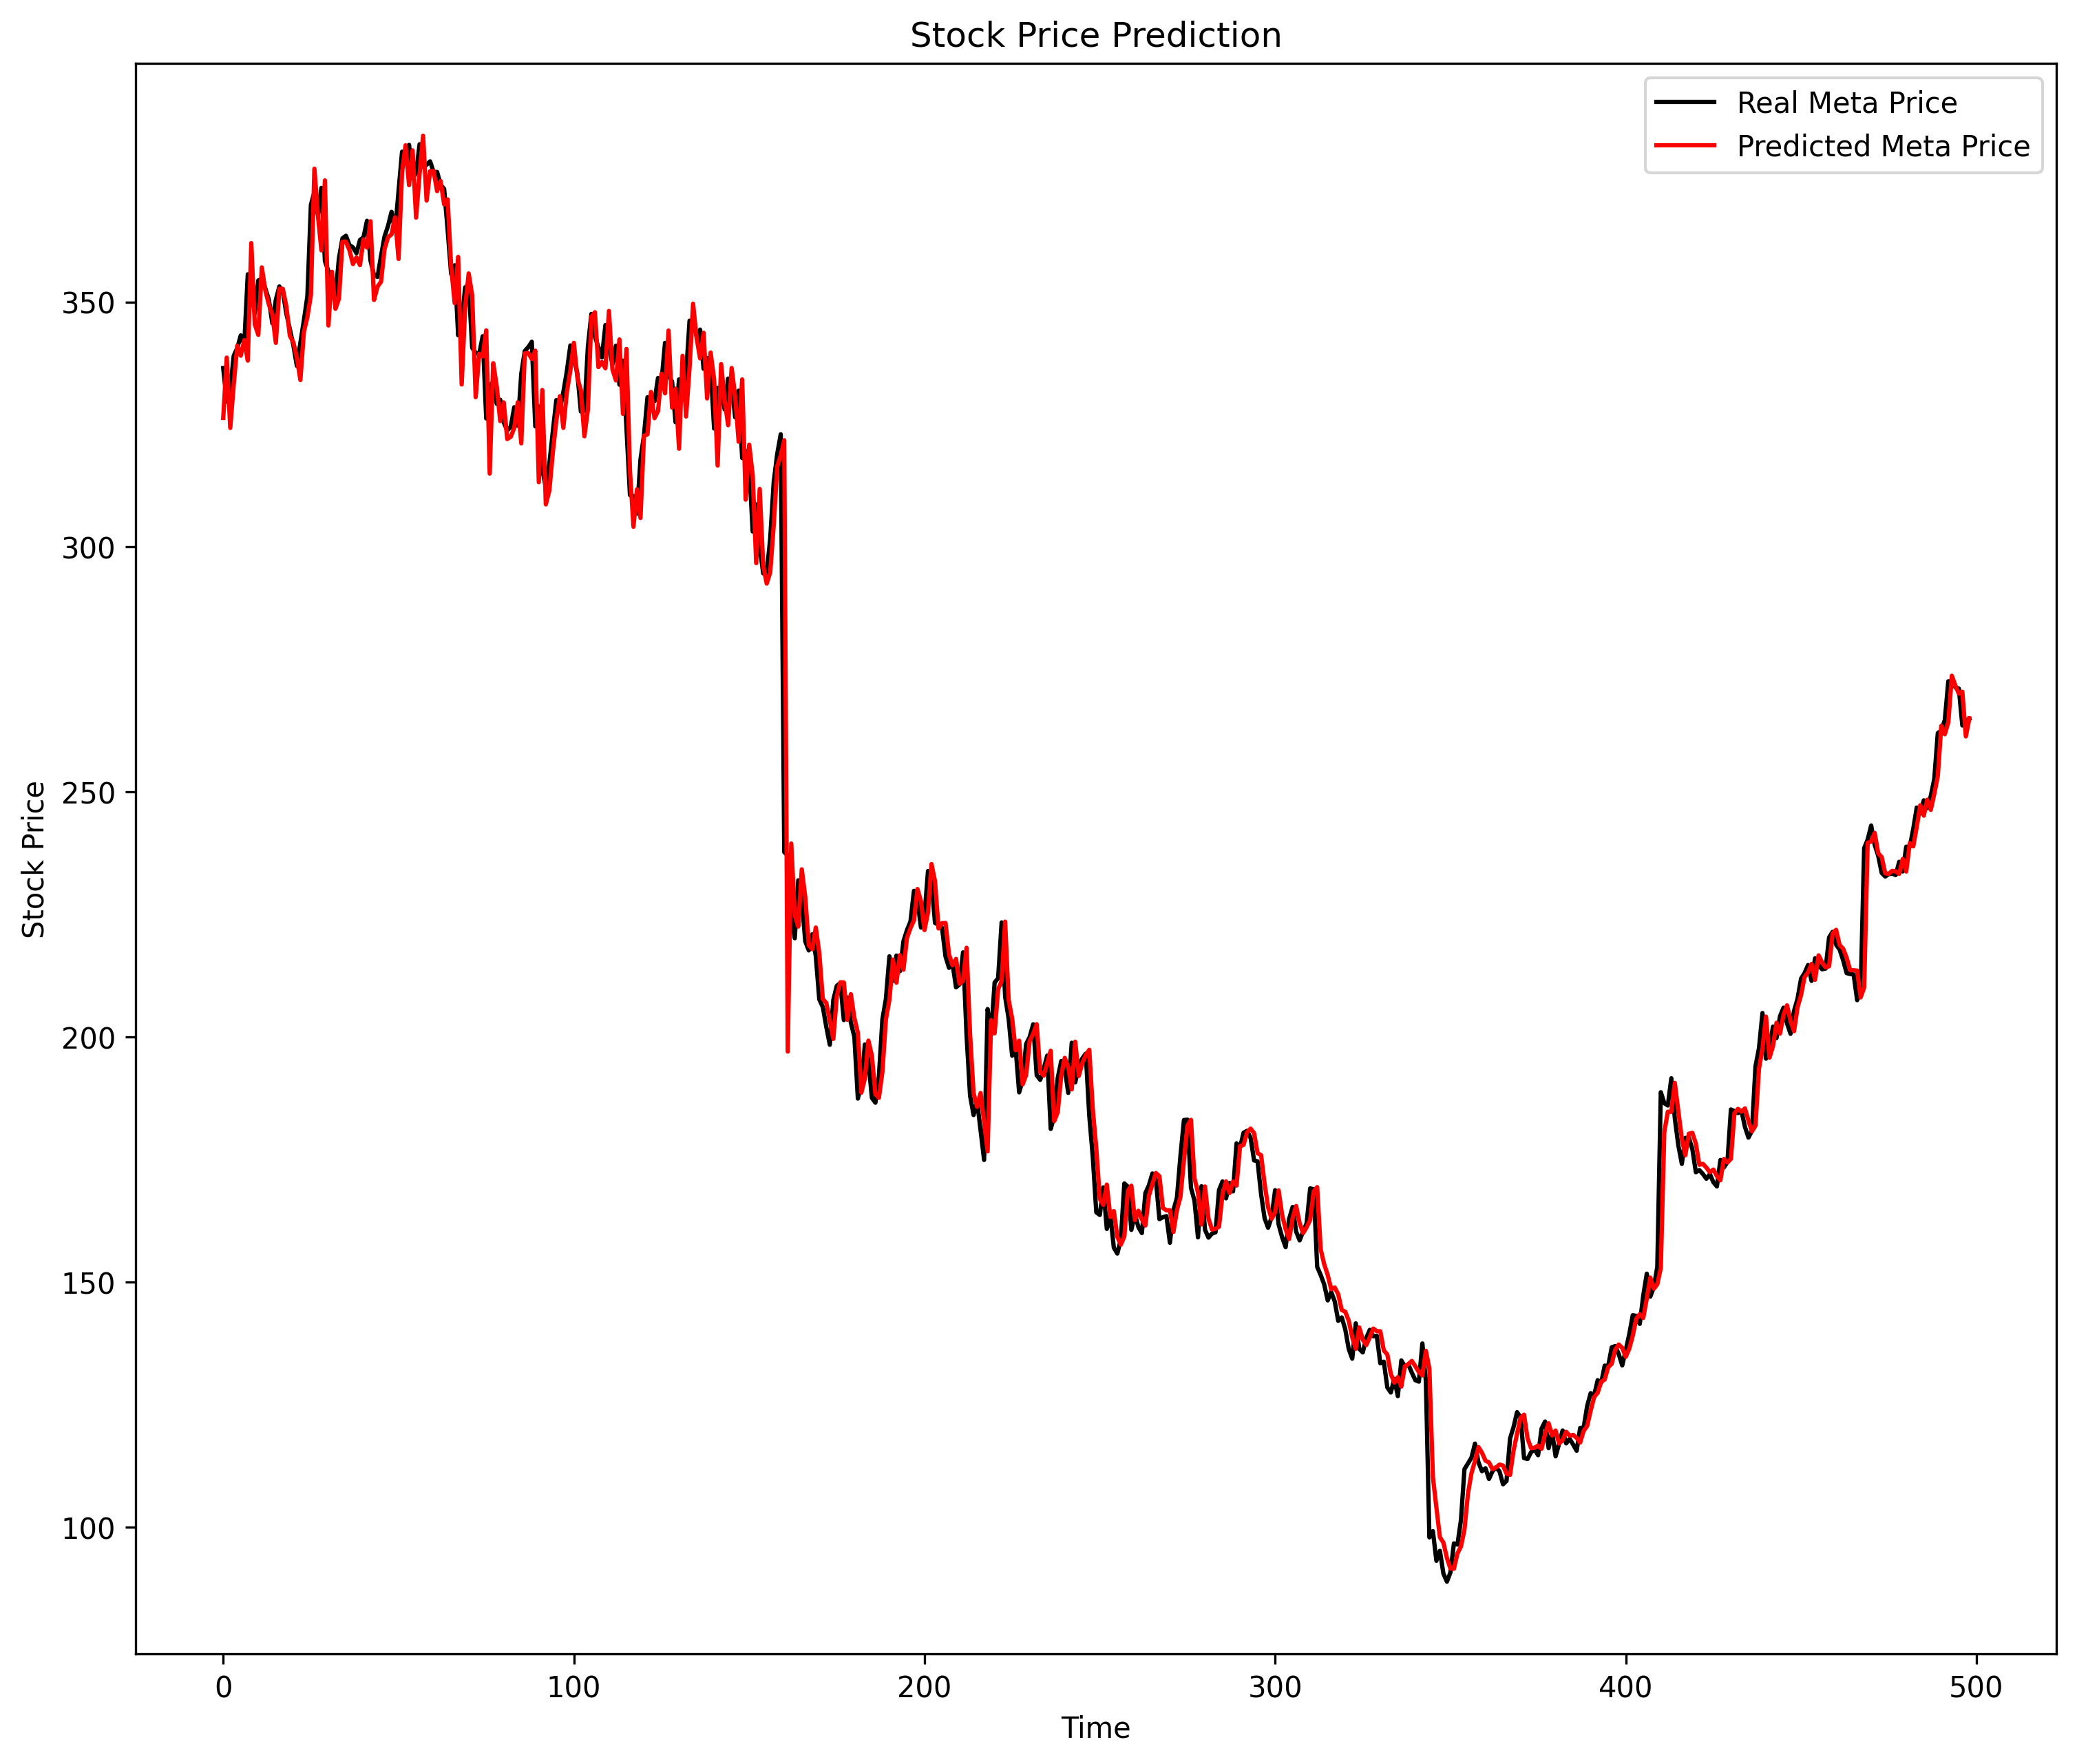

In [120]:
plt.figure(figsize=(12,10),dpi=300)
plt.plot(actual_price, color = 'black', label = 'Real Meta Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Meta Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [123]:
# Symmetric Mean Absolute Percentage Error (SMAPE)
def SMAPE_calulate(y_true, y_pred):
    n = len(y_true)
    SMAPE=(100 / n) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
    return SMAPE

# Relative Absolute Error (RAE)
def RAE_calculate(y_true, y_pred):
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    return RAE

# Mean Relative Absolute Error (MRAE)
def MRAE_calculate(y_true, y_pred):
    n=len(y_true)
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    MRAE=RAE/n
    return MRAE

# Median Relative Absolute Error (MdRAE) comparing with benchmark
# Note: By default, the bench value is the mean of actual value
def MdRAE_calculate(y_true, y_pred, bench=None):
    if bench==None:
        bench=np.mean(y_true)
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE,bench
    else:
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE
    
# Relative Squared Error (RSE) & Root Relative Squared Error (RRSE)
def RSE_calculate(y_true, y_pred, Root=False):
    mse = np.mean((y_true - y_pred)**2)
    denominator = np.var(y_true)
    RSE=mse/denominator
    
    if Root==True:
        return np.sqrt(RSE)
    else:
        return RSE

In [124]:
predicted_price
actual_price

MAE=mean_absolute_error(actual_price,predicted_price)
MSE=mean_squared_error(actual_price,predicted_price,squared=True)
RMSE=mean_squared_error(actual_price,predicted_price,squared=False)
MAPE=mean_absolute_percentage_error(actual_price,predicted_price)
SMAPE=SMAPE_calulate(actual_price,predicted_price)
RAE=RAE_calculate(actual_price,predicted_price)
MRAE=MRAE_calculate(actual_price,predicted_price)
MdRAE=MdRAE_calculate(actual_price,predicted_price)
RSE=RSE_calculate(actual_price,predicted_price,Root=False)
RRSE=RSE_calculate(actual_price,predicted_price,Root=True)

print('MAE:',round(MAE,3))
print('MSE:',round(MSE,3))
print('RMSE:',round(RMSE,3))
print('MAPE:',round(MAPE*100,3),'%')
print('SMAPE:',round(SMAPE,3),'%')
print('RAE:',round(RAE,3))
print('MRAE:',MRAE)
print('MdRAE:',round(MdRAE[0],3),'bench:',round(MdRAE[1],3))
print('RSE:',round(RSE,3))
print('RRSE:',round(RRSE,3))

MAE: 5.11
MSE: 62.343
RMSE: 7.896
MAPE: 2.426 %
SMAPE: 2.407 %
RAE: 0.069
MRAE: 0.0001379781655835911
MdRAE: 0.055 bench: 230.188
RSE: 0.009
RRSE: 0.093


# 多變量使用的方法 把切好的原始資料套用方法

In [ ]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, single_step=False):
  data = []
  labels = []
  
  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size
  
  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    data.append(dataset[indices])
    
    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])
  
  return np.array(data), np.array(labels)